# The game of life

Exercise 4.1 One-dimensional cellular automata

In [38]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
w = 60
h = 60
screen = np.zeros((w,h))
next_field = np.zeros(w)
current_field = [np.random.randint(0,2) for x in range(w)]
screen[0] = current_field
print(current_field)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1]


In [3]:
# change the rules to binary
rule = 184
rule_binary = [int(x) for x in np.binary_repr(rule, width = 8)]


In [4]:
# make mapping matrix
mapping_pattern = np.zeros([8,3])
for i in range(8):
  mapping_pattern[i,:] = [int(x) for x in np.binary_repr(7-i, width = 3)]
print(mapping_pattern)

[[1. 1. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [5]:
# calculate next_field
# compare the pattern and return certain 0 or 1 according to the rule
def calculate_next_field(current_field):
    for x in range(w-1):   
        # compare with all 8 patterns
        for k in range(8):
            if np.array_equal(mapping_pattern[k,:], current_field[x:x+3]):
                next_field[x+1] = rule_binary[k]
                
    # setting of the boundary elements
    first_neighbor = [current_field[w-1],current_field[0],current_field[1]]
    last_neighbor = [current_field[w-2],current_field[w-1],current_field[0]]
    
    for k in range(8):
        if np.array_equal(mapping_pattern[k,:], first_neighbor):
            next_field[0] = rule_binary[k]
        if np.array_equal(mapping_pattern[k,:], last_neighbor):
            next_field[w-1] = rule_binary[k]
            
    return next_field

In [6]:
#update the data by moving all the rows downwards
def update_screen(t, screen, img):
    current_field = screen[0]
    for x in range(1,h):
        screen[h-x] = screen[h-1-x]
    next_field = calculate_next_field(current_field)
    screen[0] = next_field
    img.set_array(screen)
    return img,

<IPython.core.display.Javascript object>


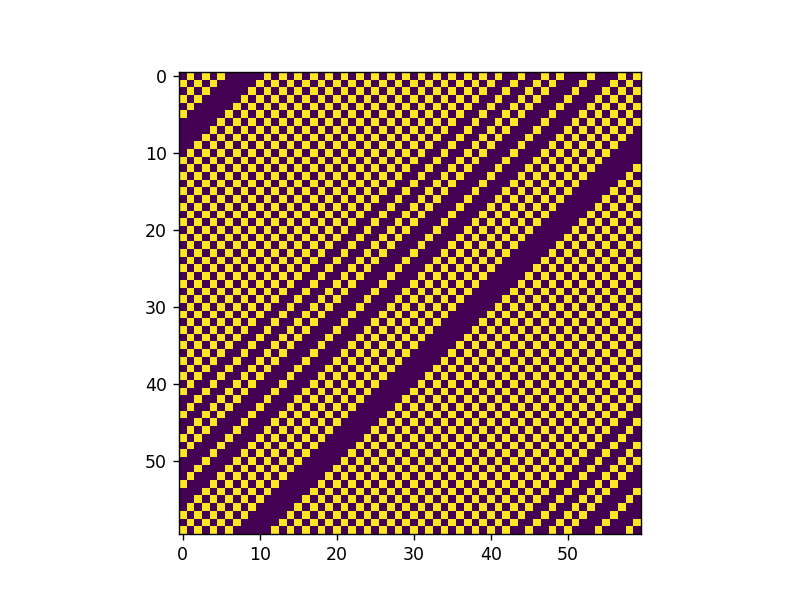

In [7]:
framerate = 10

def create_animation(screen, framerate):
    fig = plt.figure()
    img = plt.imshow(screen, interpolation='none', animated=True)
    animation = anim.FuncAnimation(fig=fig, func=update_screen, frames=len(screen), interval=1000/framerate, fargs=(screen,img), blit=True)    
    return animation

a = create_animation(screen,framerate)


Exercise 4.2. Game of life

In [20]:
x = 10
y = 10


In [40]:
def update_grid(t, grid, img):
    y, x = grid.shape

    counter = 0;
    old_grid = grid.copy()
    
    for i in range(y):
        for j in range(x):
            counter = (old_grid[i, (j-1)%x] + old_grid[i, (j+1)%x] +
                         old_grid[(i-1)%y, j] + old_grid[(i+1)%y, j] +
                         old_grid[(i-1)%y, (j-1)%x] + old_grid[(i-1)%y, (j+1)%x] +
                         old_grid[(i+1)%y, (j-1)%x] + old_grid[(i+1)%y, (j+1)%x])
            if old_grid[i,j]:
                if counter == 2 or counter == 3:
                    grid[i,j] = 1
                else:
                    grid[i,j] = 0
            else:
                if counter == 3:
                    grid[i,j] = 1
                else:
                    grid[i,j] = 0               
                    
    img.set_array(grid)       
    return img,


In [10]:
def update_grid_non_periodic(t, grid, img):
    y, x = grid.shape

    counter = 0;
    # do a padding with 0s to count the neighbor
    old_grid = np.zeros((x+2,y+2))
    old_grid[1:x+1, 1:y+1] = grid
    
    for i in range(1,y):
        for j in range(1,x):
            counter = (old_grid[i,j-1] + old_grid[i,j+1]+ 
                       old_grid[i-1,j] + old_grid[i+1,j]+
                       old_grid[i-1,j-1] + old_grid[i-1,j+1] +
                       old_grid[i+1,j-1] + old_grid[i+1,j+1])
            if old_grid[i,j]:
                if counter == 2 or counter == 3:
                    grid[i,j] = 1
                else:
                    grid[i,j] = 0
            else:
                if counter == 3:
                    grid[i,j] = 1
                else:
                    grid[i,j] = 0
    
    img.set_array(grid)
    return img,  

<IPython.core.display.Javascript object>


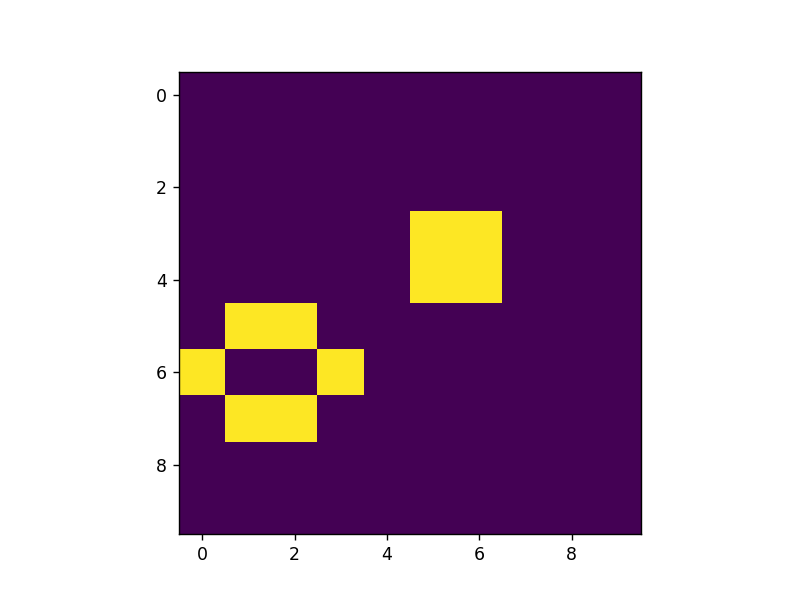

In [37]:
grid = [[np.random.randint(0,2) for i in range(x)] for j in range(10)]
grid = np.array(grid)
new_grid = np.zeros((x,y))
generation = 20

def create_animation_periodic(grid, framerate):
    fig = plt.figure()
    img = plt.imshow(grid, interpolation='none', animated=True)
    animation = anim.FuncAnimation(fig=fig, func=update_grid, frames=generation, interval=1000/framerate, fargs=(grid,img), blit=True)    
    return animation

def create_animation_non_periodic(grid, framerate):
    fig = plt.figure()
    img = plt.imshow(grid, interpolation='none', animated=True)
    animation = anim.FuncAnimation(fig=fig, func=update_grid_non_periodic, frames=generation, interval=1000/framerate, fargs=(grid,img), blit=True)    
    return animation
new_periodic = create_animation_periodic(grid,framerate)


Exercise 4.3. Time evolution of a still life.

<IPython.core.display.Javascript object>


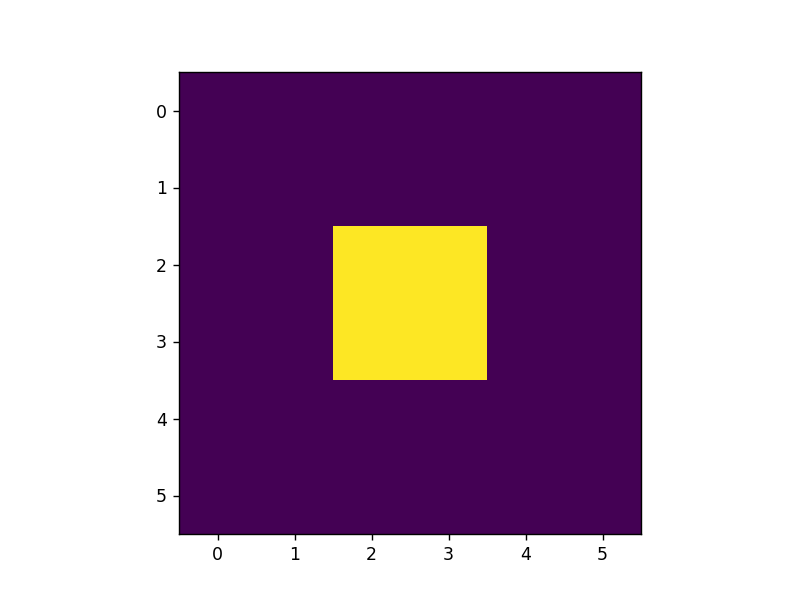

In [42]:
 grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    
grid_block = create_animation_periodic(grid,framerate)

<IPython.core.display.Javascript object>


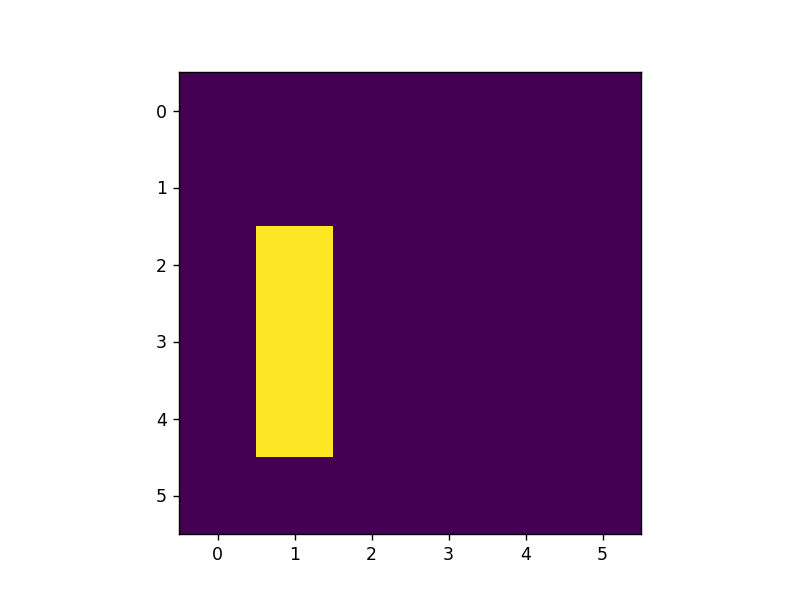

In [43]:
grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')   
    
grid_oscillate = create_animation_non_periodic(grid,framerate)